In [4]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PIL

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/Ras Kucing/Data Ras Kucing')

/content/drive/MyDrive/Colab Notebooks/Ras Kucing/Data Ras Kucing/DOMSH/DOMSH (112).jpg


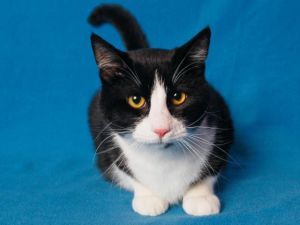

In [5]:
domestik = list(data_dir.glob('DOMSH/*'))
print(domestik[0])
PIL.Image.open(str(domestik[0]))

/content/drive/MyDrive/Colab Notebooks/Ras Kucing/Data Ras Kucing/PERSIAN/PERSIAN (102).jpg


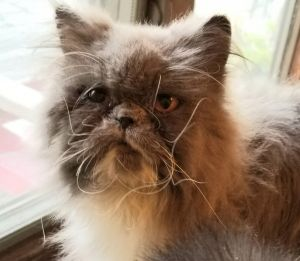

In [6]:
persia = list(data_dir.glob('PERSIAN/*'))
print(persia[0])
PIL.Image.open(str(persia[0]))

/content/drive/MyDrive/Colab Notebooks/Ras Kucing/Data Ras Kucing/TURKISH/Turkish Angora (105).jpg


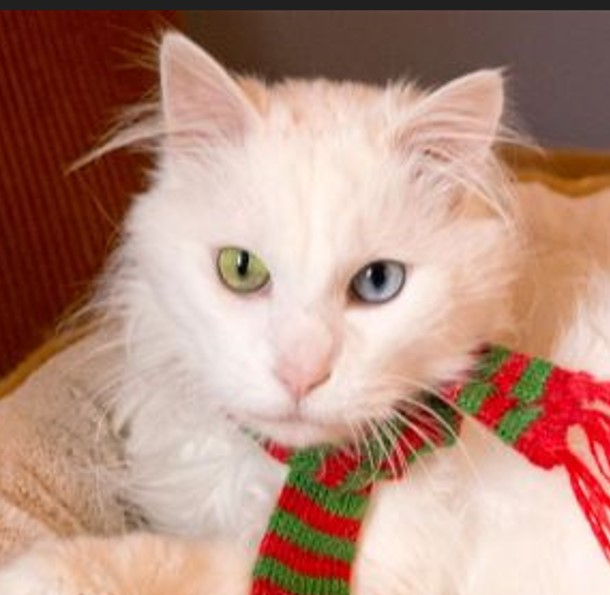

In [7]:
turki = list(data_dir.glob('TURKISH/*'))
print(turki[0])
PIL.Image.open(str(turki[0]))

In [8]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2, rotation_range=10,
                             width_shift_range=0.1, height_shift_range=0.1,
                             shear_range=0.1, zoom_range=0.1, horizontal_flip=True)

train_gen = datagen.flow_from_directory(data_dir,
                                        target_size= (150,150),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='training')

val_gen = datagen.flow_from_directory(data_dir,
                                        target_size= (150,150),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation')

Found 480 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [9]:
class_names = train_gen.class_indices
print(class_names)

{'DOMSH': 0, 'PERSIAN': 1, 'TURKISH': 2}


In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [11]:
base_model = VGG16(include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(3, activation='softmax')(x)

model = Model(base_model.input, x)

58889256/58889256 [==============================] - 0s 0us/step


In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
15/15 [==============================] - 249s 16s/step - loss: 1.2561 - accuracy: 0.6042 - val_loss: 0.2787 - val_accuracy: 0.9000
Epoch 2/10
15/15 [==============================] - 172s 11s/step - loss: 0.3607 - accuracy: 0.8479 - val_loss: 0.1890 - val_accuracy: 0.9417
Epoch 3/10
15/15 [==============================] - 170s 11s/step - loss: 0.2582 - accuracy: 0.8938 - val_loss: 0.2736 - val_accuracy: 0.9000
Epoch 4/10
15/15 [==============================] - 176s 12s/step - loss: 0.2754 - accuracy: 0.8979 - val_loss: 0.2464 - val_accuracy: 0.9250
Epoch 5/10
15/15 [==============================] - 176s 12s/step - loss: 0.1943 - accuracy: 0.9333 - val_loss: 0.2021 - val_accuracy: 0.9167
Epoch 6/10
15/15 [==============================] - 168s 11s/step - loss: 0.1625 - accuracy: 0.9333 - val_loss: 0.1780 - val_accuracy: 0.9500
Epoch 7/10
15/15 [==============================] - 184s 12s/step - loss: 0.1561 - accuracy: 0.9500 - val_loss: 0.1527 - val_accuracy: 0.9583
Epoch 

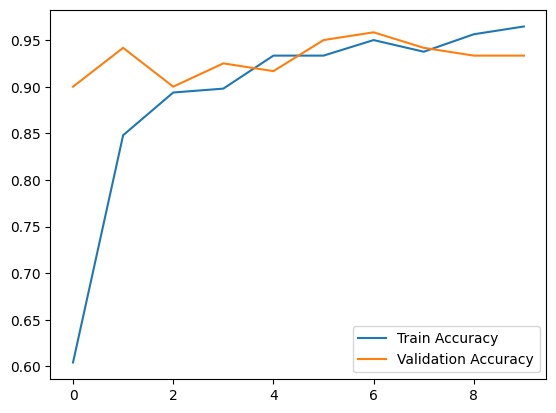

In [15]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])

4/4 [==============================] - 35s 8s/step - loss: 0.1969 - accuracy: 0.9417
Validation Loss: 0.19693726301193237
Validation Accuracy: 0.9416666626930237
4/4 [==============================] - 35s 8s/step


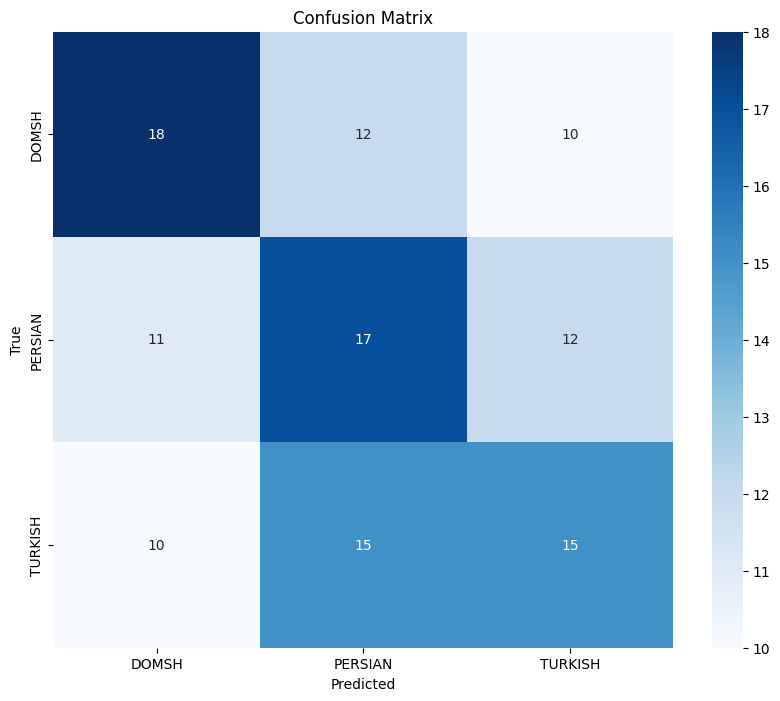

              precision    recall  f1-score   support

       DOMSH       0.46      0.45      0.46        40
     PERSIAN       0.39      0.42      0.40        40
     TURKISH       0.41      0.38      0.39        40

    accuracy                           0.42       120
   macro avg       0.42      0.42      0.42       120
weighted avg       0.42      0.42      0.42       120



In [16]:
val_loss, val_accuracy = model.evaluate(val_gen)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

predictions = model.predict(val_gen)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

class_labels = list(val_gen.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

In [17]:
from keras.preprocessing.image import load_img, img_to_array

def predict_image(img):
  img = load_img(img, target_size=(150, 150))
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  input_arr = img_to_array(img)
  input_arr = np.array([input_arr])
  prediction = model.predict(input_arr)[0]
  class_indices = {v: k for k, v in train_gen.class_indices.items()}
  result = {class_indices[i]: float(prediction[i]) for i in range(len(prediction))}
  return result

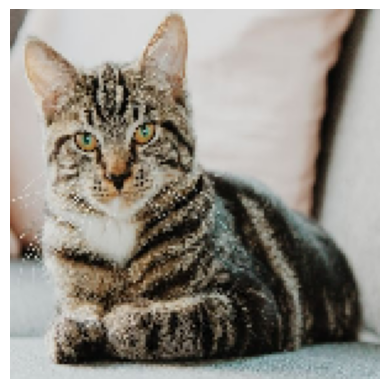

1/1 [==============================] - 2s 2s/step


{'DOMSH': 1.0, 'PERSIAN': 0.0, 'TURKISH': 0.0}

In [19]:
predict_image('/content/drive/MyDrive/animal predict/cat/1_cat.jpg')

In [18]:
!pip install gradio
import gradio as gr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.3 MB/s e

In [20]:
import tempfile

def predict_from_array(img_array):
    temp_img_path = None
    try:
        # Create a temporary file to save the image
        temp_img = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
        temp_img_path = temp_img.name
        temp_img.close()

        # Save the image array to the temporary file
        img = PIL.Image.fromarray(img_array)
        img.save(temp_img_path)

        # Predict using the temporary file path
        result = predict_image(temp_img_path)
    finally:
        # Remove the temporary file
        if temp_img_path and os.path.exists(temp_img_path):
            os.remove(temp_img_path)

    return result

In [21]:
image = gr.Image()
label = gr.Label(num_top_classes=3)

gr.Interface(fn=predict_from_array, inputs=image, outputs=label).launch(debug='True')

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://ad7f3b68a63f57abaa.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 419ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://ad7f3b68a63f57abaa.gradio.live


In [22]:
model.save("Model2VGG RasKucing.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
model.save("Model2VGG RasKucing.keras")